# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guaiuba
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | lethem
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | sibundoy
Processing Record 8 of Set 1 | torata
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | fernie
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | tezu
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | rongelap
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | whitehorse
Proc

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guaiuba,-4.0397,-38.6372,26.69,95,21,1.31,BR,1690344351
1,Ushuaia,-54.8000,-68.3000,0.81,80,75,8.23,AR,1690344294
2,Nagqu,31.5000,92.0000,9.62,68,100,4.33,CN,1690344352
3,Lethem,3.3803,-59.7968,24.61,89,100,1.61,GY,1690344352
4,Blackmans Bay,-43.0167,147.3167,15.07,65,100,2.72,AU,1690344353


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Guaiuba,-4.0397,-38.6372,26.69,95,21,1.31,BR,1690344351
1,Ushuaia,-54.8000,-68.3000,0.81,80,75,8.23,AR,1690344294
2,Nagqu,31.5000,92.0000,9.62,68,100,4.33,CN,1690344352
3,Lethem,3.3803,-59.7968,24.61,89,100,1.61,GY,1690344352
4,Blackmans Bay,-43.0167,147.3167,15.07,65,100,2.72,AU,1690344353


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-squared value is: 0.017


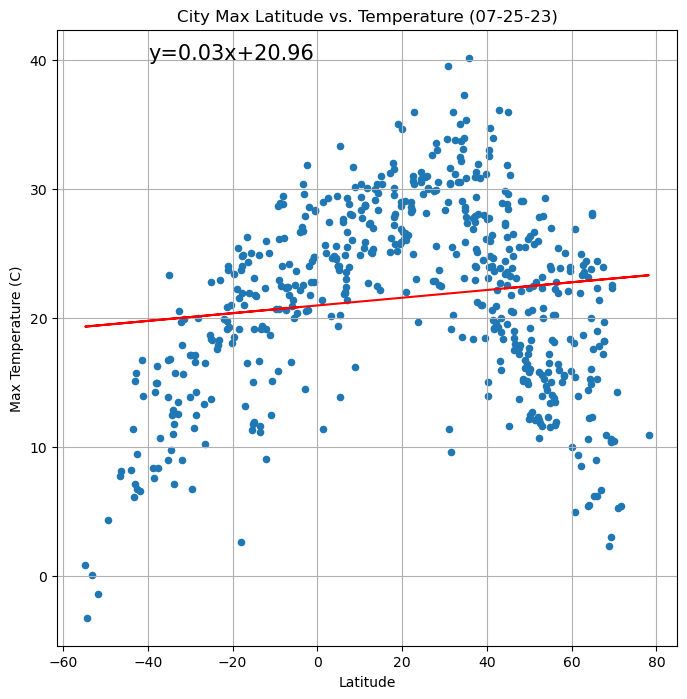

In [27]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x='Lat',y="Max Temp",grid=True,figsize=(8,8),title="City Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Max Temperature (C)")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
regress_values1=city_data_df["Lat"]*slope+intercept
line_eq1="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-40,40),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-squared value is: 0.003


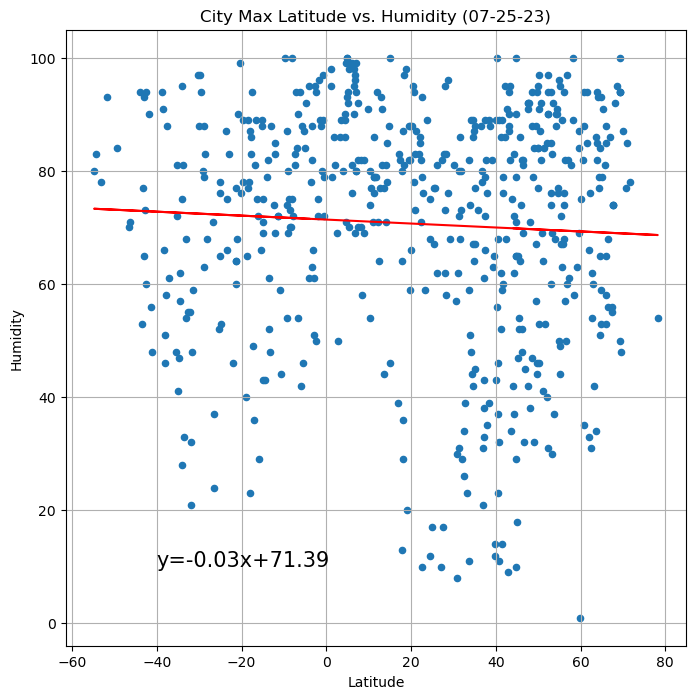

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',x='Lat',y="Humidity",grid=True,figsize=(8,8),title="City Max Latitude vs. Humidity (07-25-23)",xlabel="Latitude",ylabel="Humidity")
# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Humidity"])
regress_values2=city_data_df["Lat"]*slope+intercept
line_eq2="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values2,"r-")
plt.annotate(line_eq2,(-40,10),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-squared value is: 0.0


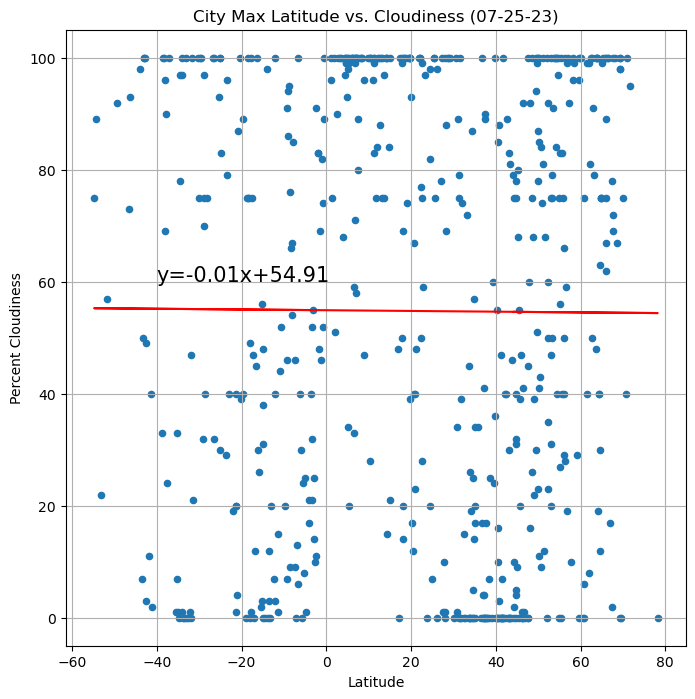

In [31]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',x='Lat',y="Cloudiness",grid=True,figsize=(8,8),title="City Max Latitude vs. Cloudiness (07-25-23)",xlabel="Latitude",ylabel="Percent Cloudiness")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Cloudiness"])
regress_values3=city_data_df["Lat"]*slope+intercept
line_eq3="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values3,"r-")
plt.annotate(line_eq3,(-40,60),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-squared value is: 0.007


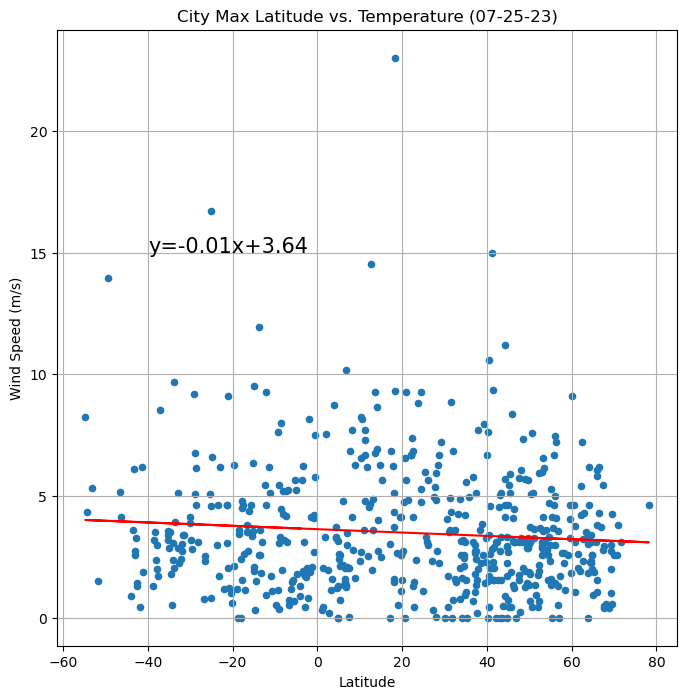

In [32]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x='Lat',y="Wind Speed",grid=True,figsize=(8,8),title="City Max Latitude vs. Temperature (07-25-23)",xlabel="Latitude",ylabel="Wind Speed (m/s)")

# Incorporate the other graph properties
(slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],city_data_df["Wind Speed"])
regress_values4=city_data_df["Lat"]*slope+intercept
line_eq4="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values4,"r-")
plt.annotate(line_eq4,(-40,15),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
linear_regression=((slope,intercept,rvalue,pvalue,stderr)=linregress(city_data_df["Lat"],y)
regress_values=city_data_df["Lat"]*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(city_data_df["Lat"],regress_values1,"r-")
plt.annotate(line_eq1,(-40,40),fontsize=15,color="black")
print(f"The r-squared value is: {round(rvalue**2,3)}"))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


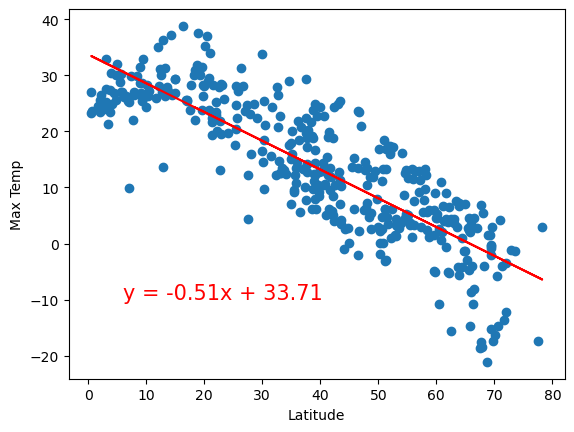

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


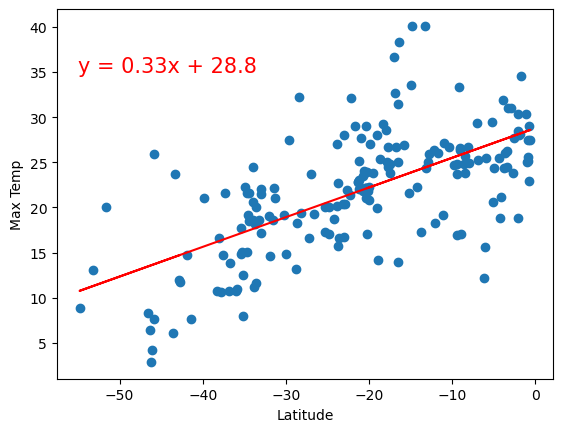

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


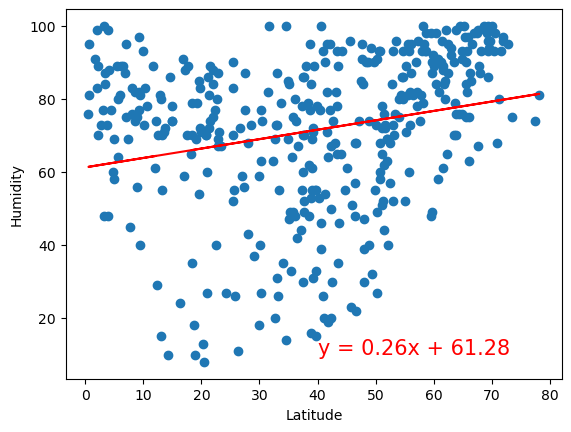

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


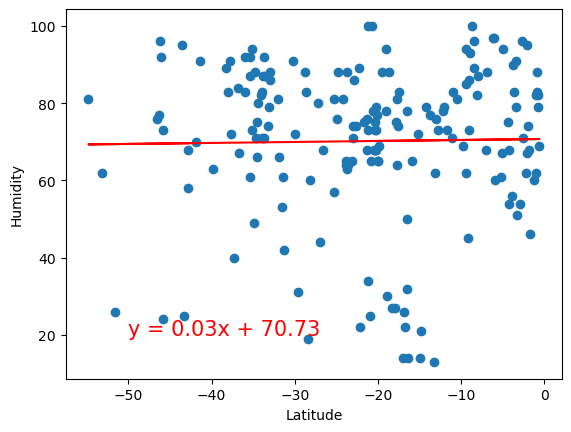

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


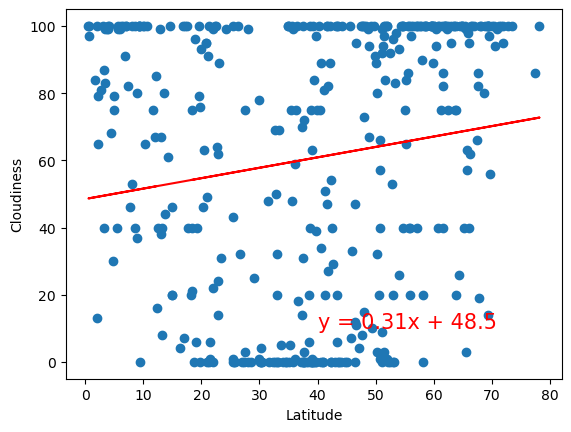

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


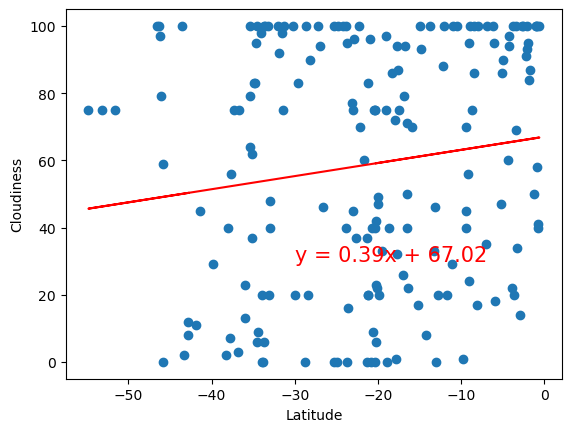

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


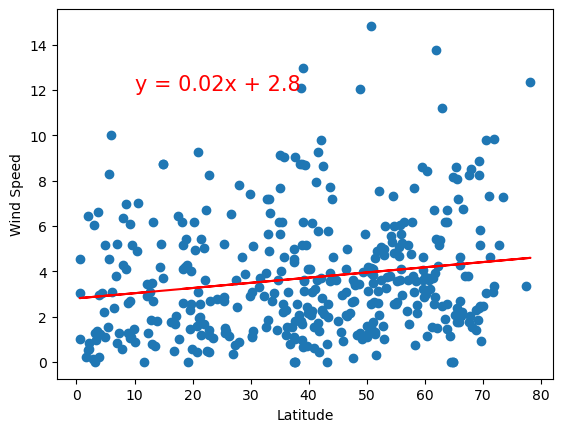

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


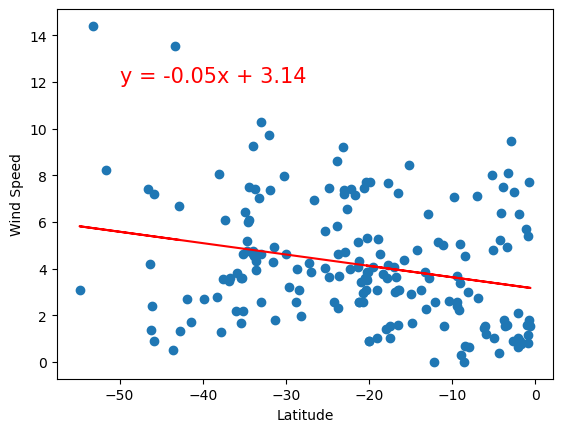

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE